In [1]:
import numpy as np
import torch


In [2]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [3]:
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [4]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [5]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.5873,  0.1307,  1.0837],
        [ 1.1671, -0.0845,  0.6151]], requires_grad=True)
tensor([-0.4552, -0.6961], requires_grad=True)


In [6]:
def model(x):
    return x @ w.t() + b

In [7]:
preds = model(inputs)
print(preds)

tensor([[ 97.7760, 105.2888],
        [133.8504, 137.4388],
        [131.0122, 125.1908],
        [105.1688, 137.4737],
        [128.4773, 114.7765]], grad_fn=<AddBackward0>)


In [8]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [9]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [10]:
loss = mse(preds, targets)
print(loss)

tensor(2499.5710, grad_fn=<DivBackward0>)


In [11]:
loss.backward()

In [12]:
print(w)
print(w.grad)

tensor([[ 0.5873,  0.1307,  1.0837],
        [ 1.1671, -0.0845,  0.6151]], requires_grad=True)
tensor([[3829.0498, 3016.3086, 2147.2322],
        [3033.9011, 1687.8875, 1363.6892]])


In [13]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [14]:
preds = model(inputs)
print(preds)

tensor([[ 97.7760, 105.2888],
        [133.8504, 137.4388],
        [131.0122, 125.1908],
        [105.1688, 137.4737],
        [128.4773, 114.7765]], grad_fn=<AddBackward0>)


In [15]:
loss = mse(preds, targets)
print(loss)

tensor(2499.5710, grad_fn=<DivBackward0>)


In [16]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[3829.0498, 3016.3086, 2147.2322],
        [3033.9011, 1687.8875, 1363.6892]])
tensor([43.0569, 32.0337])


In [17]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [18]:
print(w)
print(b)

tensor([[ 0.5490,  0.1006,  1.0622],
        [ 1.1368, -0.1014,  0.6015]], requires_grad=True)
tensor([-0.4557, -0.6965], requires_grad=True)


In [19]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(2113.0884, grad_fn=<DivBackward0>)


In [20]:
l1=[]
for i in range(1000):
    preds = model(inputs)
    loss = mse(preds, targets)
    l1.append(loss.cpu().detach().numpy())
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [21]:
w

tensor([[-0.4292,  0.7905,  0.8329],
        [-0.2710,  0.8312,  0.8163]], requires_grad=True)

In [22]:
b

tensor([-0.4649, -0.7062], requires_grad=True)

In [23]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(2.2012, grad_fn=<DivBackward0>)


In [24]:
preds

tensor([[ 56.9757,  70.3021],
        [ 83.3394, 100.0217],
        [116.4205, 134.4422],
        [ 20.5599,  37.5970],
        [104.1032, 117.5309]], grad_fn=<AddBackward0>)

In [25]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# for 1000


In [26]:
w

tensor([[-0.4292,  0.7905,  0.8329],
        [-0.2710,  0.8312,  0.8163]], requires_grad=True)

In [27]:
b

tensor([-0.4649, -0.7062], requires_grad=True)

# Plot a graph of the number of epochs vs the loss value of the model.

In [28]:
import matplotlib.pyplot as plt
type(l1)

list

In [29]:
l2=np.array(range(0,1000))

In [30]:
l1=np.array(l1)

In [31]:
l1

array([2113.0884   , 1847.2708   , 1662.8353   , 1533.3093   ,
       1440.8519   , 1373.4397   , 1322.9695   , 1283.9799   ,
       1252.7898   , 1226.9175   , 1204.6901   , 1184.9795   ,
       1167.0242   , 1150.3109   , 1134.4934   , 1119.3359   ,
       1104.6808   , 1090.4197   , 1076.4797   , 1062.8107   ,
       1049.3782   , 1036.1583   , 1023.134    , 1010.29364  ,
        997.6287   ,  985.132    ,  972.79913  ,  960.6258   ,
        948.6086   ,  936.745    ,  925.03186  ,  913.4676   ,
        902.0495   ,  890.7759   ,  879.64465  ,  868.654    ,
        857.8019   ,  847.08673  ,  836.50684  ,  826.06024  ,
        815.7455   ,  805.5608   ,  795.5045   ,  785.575    ,
        775.7705   ,  766.08984  ,  756.5311   ,  747.0929   ,
        737.77374  ,  728.57196  ,  719.4862   ,  710.51495  ,
        701.65686  ,  692.91034  ,  684.2741   ,  675.74677  ,
        667.3268   ,  659.0129   ,  650.804    ,  642.6984   ,
        634.6951   ,  626.7925   ,  618.9896   ,  611.2

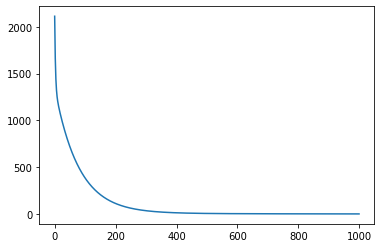

In [32]:
plt.plot(l2,l1)

In [33]:
import torch.nn as nn

In [34]:
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [35]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

In [36]:
from torch.utils.data import TensorDataset

In [37]:
train_ds = TensorDataset(inputs, targets)

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [38]:
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.5491,  0.0698, -0.5244],
        [ 0.2781,  0.5394,  0.1554]], requires_grad=True)
Parameter containing:
tensor([-0.3743, -0.5276], requires_grad=True)


In [39]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5491,  0.0698, -0.5244],
         [ 0.2781,  0.5394,  0.1554]], requires_grad=True),
 Parameter containing:
 tensor([-0.3743, -0.5276], requires_grad=True)]

In [40]:
preds = model(inputs)
preds

tensor([[ 21.8351,  62.5984],
        [ 22.1715,  82.1959],
        [ 26.3300, 104.9618],
        [ 39.2317,  56.7869],
        [  7.5026,  81.3244],
        [ 21.8351,  62.5984],
        [ 22.1715,  82.1959],
        [ 26.3300, 104.9618],
        [ 39.2317,  56.7869],
        [  7.5026,  81.3244],
        [ 21.8351,  62.5984],
        [ 22.1715,  82.1959],
        [ 26.3300, 104.9618],
        [ 39.2317,  56.7869],
        [  7.5026,  81.3244]], grad_fn=<AddmmBackward0>)

In [41]:
import torch.nn.functional as F
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(2563.7952, grad_fn=<MseLossBackward0>)


In [42]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [43]:
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [46]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 422.9674
Epoch [20/100], Loss: 385.9197
Epoch [30/100], Loss: 275.4437
Epoch [40/100], Loss: 340.1692
Epoch [50/100], Loss: 186.8352
Epoch [60/100], Loss: 126.9953
Epoch [70/100], Loss: 139.0142
Epoch [80/100], Loss: 51.7845
Epoch [90/100], Loss: 66.9167
Epoch [100/100], Loss: 57.4484


In [45]:
from torch.utils.data import DataLoader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 91.,  88.,  64.],
        [ 69.,  96.,  70.],
        [ 91.,  88.,  64.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.]])
tensor([[ 81., 101.],
        [103., 119.],
        [ 81., 101.],
        [ 81., 101.],
        [ 22.,  37.]])


In [47]:
mino = []

In [48]:
mino= fit(1000, model, loss_fn, opt, train_dl)

Epoch [10/1000], Loss: 71.0997
Epoch [20/1000], Loss: 53.5428
Epoch [30/1000], Loss: 46.3899
Epoch [40/1000], Loss: 30.9717
Epoch [50/1000], Loss: 53.2324
Epoch [60/1000], Loss: 49.0318
Epoch [70/1000], Loss: 38.9226
Epoch [80/1000], Loss: 45.4361
Epoch [90/1000], Loss: 15.4119
Epoch [100/1000], Loss: 22.8039
Epoch [110/1000], Loss: 42.3402
Epoch [120/1000], Loss: 39.1673
Epoch [130/1000], Loss: 14.8743
Epoch [140/1000], Loss: 37.9936
Epoch [150/1000], Loss: 3.0158
Epoch [160/1000], Loss: 2.8227
Epoch [170/1000], Loss: 8.9895
Epoch [180/1000], Loss: 15.5542
Epoch [190/1000], Loss: 8.0905
Epoch [200/1000], Loss: 14.0296
Epoch [210/1000], Loss: 11.2939
Epoch [220/1000], Loss: 23.0082
Epoch [230/1000], Loss: 16.6584
Epoch [240/1000], Loss: 20.6492
Epoch [250/1000], Loss: 14.7556
Epoch [260/1000], Loss: 8.4735
Epoch [270/1000], Loss: 13.5907
Epoch [280/1000], Loss: 8.7787
Epoch [290/1000], Loss: 13.5855
Epoch [300/1000], Loss: 7.8194
Epoch [310/1000], Loss: 8.1459
Epoch [320/1000], Loss: 7

In [50]:
preds = model(inputs)
preds

tensor([[ 57.1696,  70.2563],
        [ 81.9777, 100.5225],
        [119.3942, 133.4361],
        [ 21.2991,  37.1644],
        [101.3072, 118.6856],
        [ 57.1696,  70.2563],
        [ 81.9777, 100.5225],
        [119.3942, 133.4361],
        [ 21.2991,  37.1644],
        [101.3072, 118.6856],
        [ 57.1696,  70.2563],
        [ 81.9777, 100.5225],
        [119.3942, 133.4361],
        [ 21.2991,  37.1644],
        [101.3072, 118.6856]], grad_fn=<AddmmBackward0>)

In [51]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])